In [1]:
# modules
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# read data
df = pd.read_csv('data_semi_train.csv')
stats = pd.read_csv('stat_out.csv')
data_org = df.iloc[:,1:]
label_org = df['Label']
stats_org = stats.copy()

data = data_org.copy()
label = label_org.copy()




In [40]:
data_org.shape

(11491, 590)

In [3]:
col_inidx = (stats['p']<0.05) 

In [4]:
sum(col_inidx)

357

In [5]:
col_include = stats['var'][col_inidx].values

In [6]:
data = data[col_include]

In [7]:
data.shape

(11491, 357)

In [8]:
data.shape

(11491, 357)

In [9]:
na_mat = np.isnan(data)
na_row = na_mat.sum(axis=1)
na_col = na_mat.sum(axis=0)

(array([6.470e+02, 9.548e+03, 1.220e+03, 4.700e+01, 1.400e+01, 9.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 2.000e+00]),
 array([ 1. ,  9.2, 17.4, 25.6, 33.8, 42. , 50.2, 58.4, 66.6, 74.8, 83. ]),
 <BarContainer object of 10 artists>)

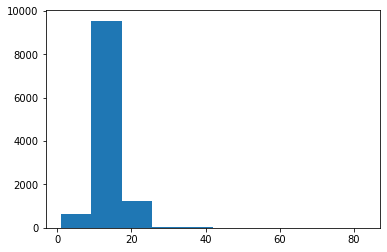

In [10]:
plt.hist(na_row)

In [11]:
max(na_row)

83

In [12]:
na_col

v001      42
v004     100
v005     110
v007     110
v008      72
        ... 
v580    6971
v581    6943
v583       9
v588      11
v589       5
Length: 357, dtype: int64

(array([325.,  16.,   0.,   0.,   1.,   4.,   3.,   5.,   0.,   3.]),
 array([    0. ,  1046.5,  2093. ,  3139.5,  4186. ,  5232.5,  6279. ,
         7325.5,  8372. ,  9418.5, 10465. ]),
 <BarContainer object of 10 artists>)

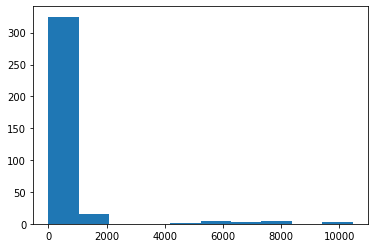

In [13]:
plt.hist(na_col)

In [39]:
data.shape

(11467, 325)

In [14]:
var_inidx = na_col < data.shape[0]*0.1
sample_inidx = na_row < data.shape[1]*0.1

In [37]:
var_inidx

v001     True
v004     True
v005     True
v007     True
v008     True
        ...  
v580    False
v581    False
v583     True
v588     True
v589     True
Length: 357, dtype: bool

In [15]:
var_inidx.sum()

325

In [38]:
sample_inidx

0        True
1        True
2        True
3        True
4        True
         ... 
11486    True
11487    True
11488    True
11489    True
11490    True
Length: 11491, dtype: bool

In [16]:
sample_inidx.sum()

11467

In [17]:
data.shape

(11491, 357)

In [18]:
col = data.columns[var_inidx]
data = data[col]
data = data[sample_inidx]
label = label[sample_inidx]

In [19]:
data.shape

(11467, 325)

In [20]:
label.shape

(11467,)

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
?SimpleImputer

In [23]:
model_imp = SimpleImputer(strategy='median')

In [24]:
model_imp.fit(data)

SimpleImputer(strategy='median')

In [25]:
data = model_imp.transform(data)

In [26]:
data = pd.DataFrame(data)

In [27]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,2872.0667,989.1645,-2.7843,101.4519,0.1211,1.5088,-0.0097,-0.0038,0.9645,9.6299,...,1.9840,-15.3531,0.2343,-4.8297,0.0794,-3.5013,11.6001,0.5026,0.0214,0.0068
1,2925.8098,1281.4768,-3.0935,102.7180,0.1217,1.4794,-0.0188,0.0031,0.9568,9.3448,...,2.1399,-18.0346,0.2534,-5.1159,0.1058,-3.2926,11.4859,0.5028,0.0086,0.0019
2,2985.1397,984.9040,-2.3782,104.8891,0.1280,1.3588,0.0228,-0.0053,0.9797,6.4720,...,2.3682,-16.8353,0.2469,-5.0948,0.0709,-3.3805,10.0319,0.4963,0.0153,0.0053
3,3205.5703,2348.6859,-2.2280,92.2493,0.1256,1.4360,-0.0083,0.0032,0.9752,10.0622,...,2.0877,-14.7022,0.3144,-4.4944,0.0949,-2.7644,14.8545,0.4980,0.0150,0.0060
4,3065.9593,1190.3008,-2.2051,101.0354,0.1260,1.5015,-0.0236,-0.0029,0.9759,9.6206,...,1.8133,-16.6428,0.1656,-5.0506,0.0501,-3.5106,9.6399,0.5024,0.0114,0.0046


In [28]:
data.columns = col 

In [29]:
data.head()

,v001,v004,v005,v007,v008,v009,v010,v011,v012,v015,...,v572,v573,v574,v575,v576,v577,v578,v583,v588,v589
0,2872.0667,989.1645,-2.7843,101.4519,0.1211,1.5088,-0.0097,-0.0038,0.9645,9.6299,...,1.9840,-15.3531,0.2343,-4.8297,0.0794,-3.5013,11.6001,0.5026,0.0214,0.0068
1,2925.8098,1281.4768,-3.0935,102.7180,0.1217,1.4794,-0.0188,0.0031,0.9568,9.3448,...,2.1399,-18.0346,0.2534,-5.1159,0.1058,-3.2926,11.4859,0.5028,0.0086,0.0019
2,2985.1397,984.9040,-2.3782,104.8891,0.1280,1.3588,0.0228,-0.0053,0.9797,6.4720,...,2.3682,-16.8353,0.2469,-5.0948,0.0709,-3.3805,10.0319,0.4963,0.0153,0.0053
3,3205.5703,2348.6859,-2.2280,92.2493,0.1256,1.4360,-0.0083,0.0032,0.9752,10.0622,...,2.0877,-14.7022,0.3144,-4.4944,0.0949,-2.7644,14.8545,0.4980,0.0150,0.0060
4,3065.9593,1190.3008,-2.2051,101.0354,0.1260,1.5015,-0.0236,-0.0029,0.9759,9.6206,...,1.8133,-16.6428,0.1656,-5.0506,0.0501,-3.5106,9.6399,0.5024,0.0114,0.0046


In [30]:

# outlier
for i in range(data.shape[1]):
    x = data.iloc[:,i]
    m = x.mean()
    s = np.sqrt(x.var(ddof=1))
    uidx = x>m+6*s
    lidx = x<m-6*s
    usub = x[~uidx & ~lidx].max()
    lsub = x[~uidx & ~lidx].min()
    x[uidx] = usub
    x[lidx] = lsub
    data.iloc[:,i] = x


In [31]:
data.head()

,v001,v004,v005,v007,v008,v009,v010,v011,v012,v015,...,v572,v573,v574,v575,v576,v577,v578,v583,v588,v589
0,2872.0667,989.1645,-2.7843,101.4519,0.1211,1.5088,-0.0097,-0.0038,0.9645,9.6299,...,1.9840,-15.3531,0.2343,-4.8297,0.0794,-3.5013,11.6001,0.5026,0.0214,0.0068
1,2925.8098,1281.4768,-3.0935,102.7180,0.1217,1.4794,-0.0188,0.0031,0.9568,9.3448,...,2.1399,-18.0346,0.2534,-5.1159,0.1058,-3.2926,11.4859,0.5028,0.0086,0.0019
2,2985.1397,984.9040,-2.3782,104.8891,0.1280,1.3588,0.0228,-0.0053,0.9797,6.4720,...,2.3682,-16.8353,0.2469,-5.0948,0.0709,-3.3805,10.0319,0.4963,0.0153,0.0053
3,3205.5703,2348.6859,-2.2280,92.2493,0.1256,1.4360,-0.0083,0.0032,0.9752,10.0622,...,2.0877,-14.7022,0.3144,-4.4944,0.0949,-2.7644,14.8545,0.4980,0.0150,0.0060
4,3065.9593,1190.3008,-2.2051,101.0354,0.1260,1.5015,-0.0236,-0.0029,0.9759,9.6206,...,1.8133,-16.6428,0.1656,-5.0506,0.0501,-3.5106,9.6399,0.5024,0.0114,0.0046


In [32]:
data.shape

(11467, 325)

In [33]:
label.shape

(11467,)

In [34]:
# clean data out
df_out = data.copy()
df_out['Label'] = label.values
col = df_out.columns
col = col[-1:].append(col[:-1])
df_out = df_out[col]

In [35]:
df_out.head()

,Label,v001,v004,v005,v007,v008,v009,v010,v011,v012,...,v572,v573,v574,v575,v576,v577,v578,v583,v588,v589
0,normal,2872.0667,989.1645,-2.7843,101.4519,0.1211,1.5088,-0.0097,-0.0038,0.9645,...,1.9840,-15.3531,0.2343,-4.8297,0.0794,-3.5013,11.6001,0.5026,0.0214,0.0068
1,normal,2925.8098,1281.4768,-3.0935,102.7180,0.1217,1.4794,-0.0188,0.0031,0.9568,...,2.1399,-18.0346,0.2534,-5.1159,0.1058,-3.2926,11.4859,0.5028,0.0086,0.0019
2,normal,2985.1397,984.9040,-2.3782,104.8891,0.1280,1.3588,0.0228,-0.0053,0.9797,...,2.3682,-16.8353,0.2469,-5.0948,0.0709,-3.3805,10.0319,0.4963,0.0153,0.0053
3,normal,3205.5703,2348.6859,-2.2280,92.2493,0.1256,1.4360,-0.0083,0.0032,0.9752,...,2.0877,-14.7022,0.3144,-4.4944,0.0949,-2.7644,14.8545,0.4980,0.0150,0.0060
4,normal,3065.9593,1190.3008,-2.2051,101.0354,0.1260,1.5015,-0.0236,-0.0029,0.9759,...,1.8133,-16.6428,0.1656,-5.0506,0.0501,-3.5106,9.6399,0.5024,0.0114,0.0046


In [36]:
df_out.to_csv('data_semi_train_clean.csv',index=False)